## Load data

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder

def load_dataset(dataset_path):
    df = pd.read_csv(dataset_path)
    features = df.drop(columns=['stroke'])
    labels= df['stroke']
    return features, labels, df

dataset_path = "./../raw_data/raw_data.csv"

features, labels, df = load_dataset(dataset_path)
df = df.dropna()

## Extract dataset information

### Show dataset

In [25]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### Descriptive statistics

In [26]:
data_types = {
    'categorical': ['gender', 'work_type', 'Residence_type', 'smoking_status'],
    'boolean': ['hypertension''heart_disease', 'ever_married', 'stroke'],
    'numerical' : ['age', 'avg_glucose_level', 'bmi']
}

df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909,4909.000000,4909.000000,4909.000000,4909,4909,4909,4909.000000,4909.000000,4909,4909.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2897,NaN,NaN,NaN,3204,2811,2490,NaN,NaN,1852,NaN
mean,37064.313506,NaN,42.865374,0.091872,0.049501,NaN,NaN,NaN,105.305150,28.893237,NaN,0.042575
std,20995.098457,NaN,22.555115,0.288875,0.216934,NaN,NaN,NaN,44.424341,7.854067,NaN,0.201917
min,77.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,18605.000000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.070000,23.500000,NaN,0.000000
50%,37608.000000,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.680000,28.100000,NaN,0.000000
75%,55220.000000,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,113.570000,33.100000,NaN,0.000000


### Unique values for each column

In [27]:
print("Unique Count")
for column in df.columns:
    num_unique = len(df[column].unique())
    print(f'{column}: {num_unique}')

Unique Count
id: 4909
gender: 3
age: 104
hypertension: 2
heart_disease: 2
ever_married: 2
work_type: 5
Residence_type: 2
avg_glucose_level: 3852
bmi: 418
smoking_status: 4
stroke: 2


### Plot frequency for categorical and numerical columns

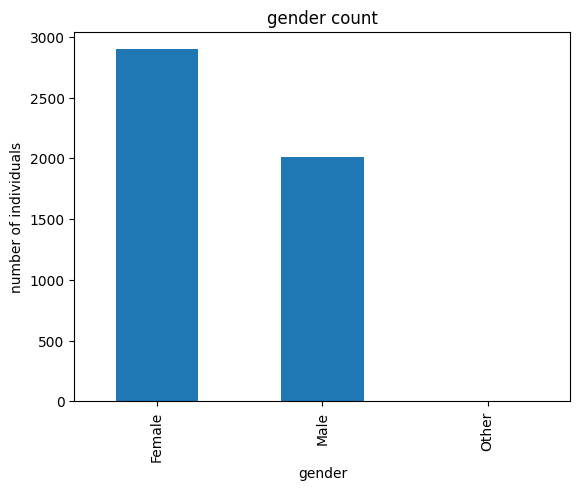

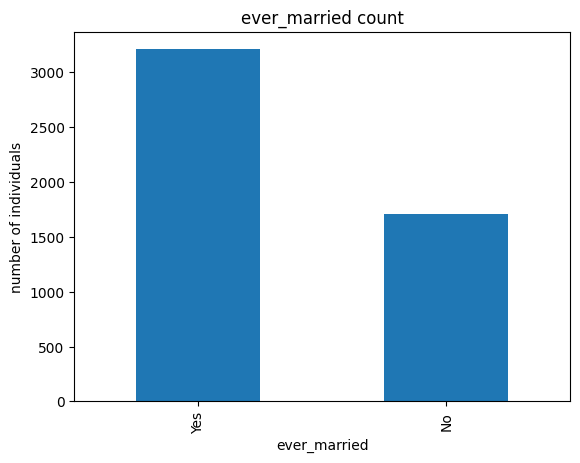

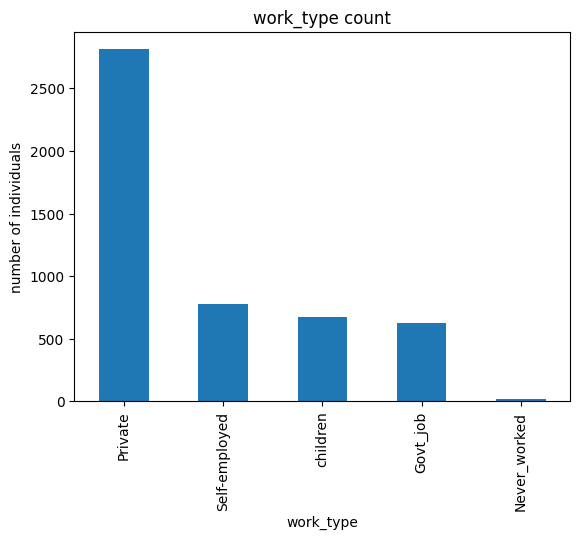

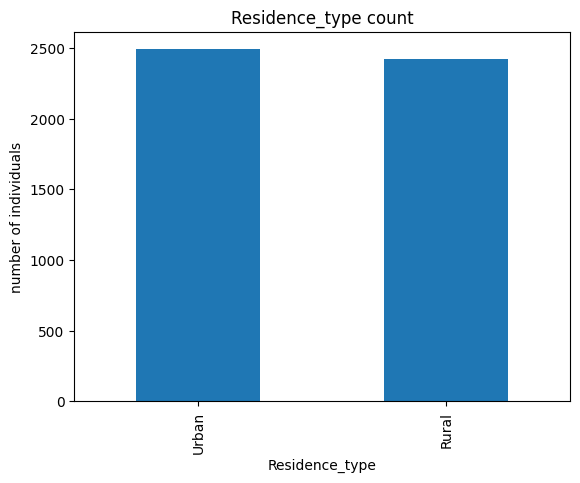

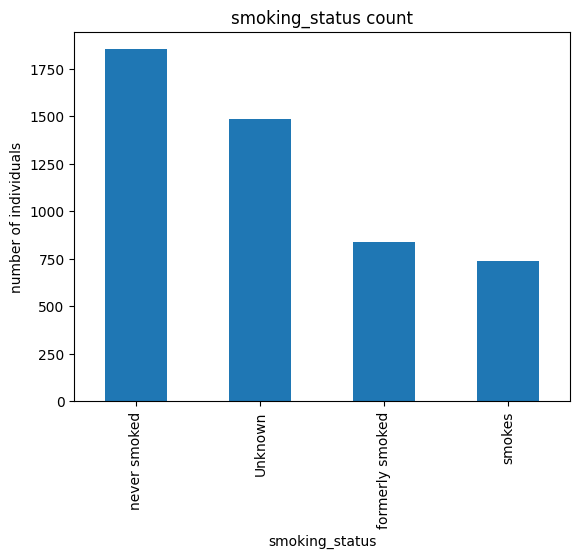

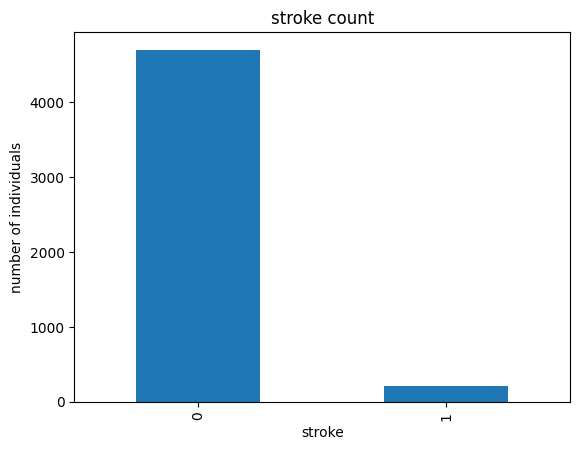

In [28]:
# Plot for categorical/boolean columns: gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status, stroke
def plot_counts_categorical(column_name):
    if len(df[column_name].unique()) > 5:
        print("Column is not categorical, please use a categorical column")
        return
    df[column_name].value_counts().plot(kind='bar')
    plt.title(f'{column_name} count')
    plt.ylabel("number of individuals")
    plt.show()

for column in df.columns:
    if column in data_types['categorical'] or column in data_types['boolean']:
        plot_counts_categorical(column)


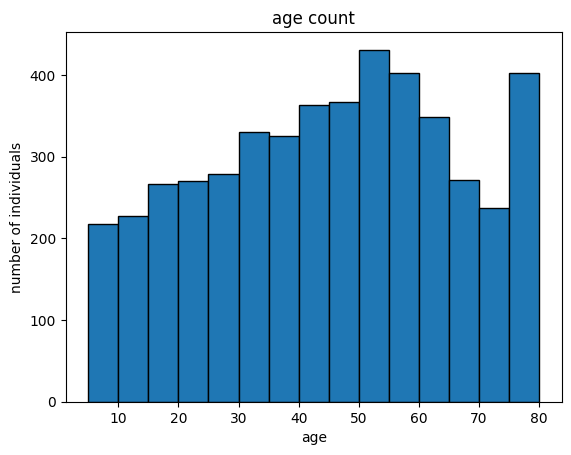

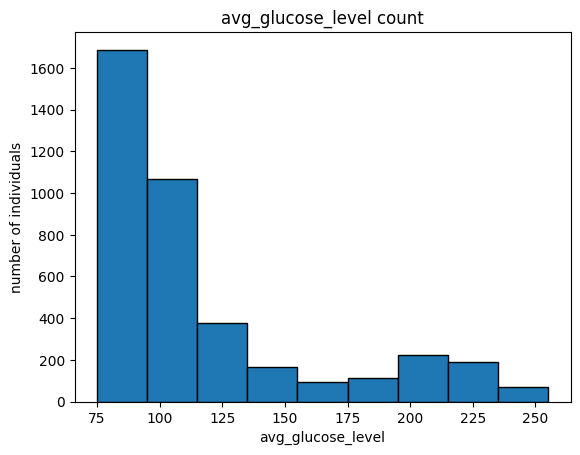

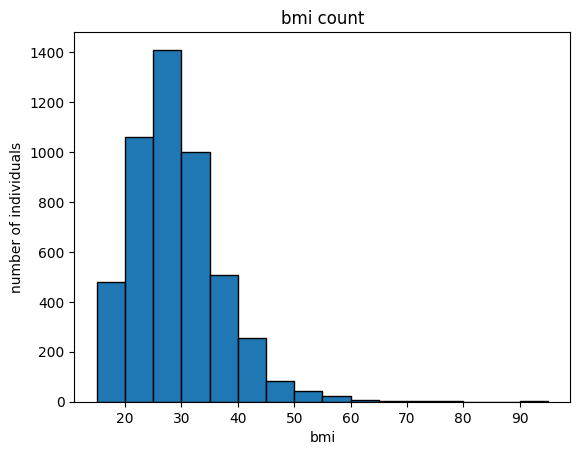

In [29]:
# Histogram for numerical columns: age, avg_glucose_level, bmi
def plot_counts_numerical(column_name, step = 10):
    if column_name not in data_types['numerical']:
        print("Column is not numerical, please use a numerical column")
        return

    min = math.floor(features[column_name].min())
    max = math.ceil(features[column_name].max())
    bins = np.arange(start=min + step, stop=max, step = step)

    plt.hist(features[column_name], bins=bins, edgecolor='black')
    plt.title(f"{column_name} count")
    plt.ylabel("number of individuals")
    plt.xlabel(f"{column_name}")
    plt.show()
    
plot_counts_numerical('age', 5)
plot_counts_numerical('avg_glucose_level', 20)
plot_counts_numerical('bmi', 5)

### Distribution of stroke

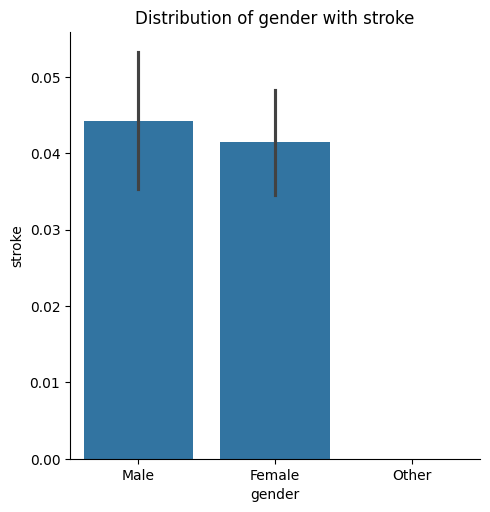

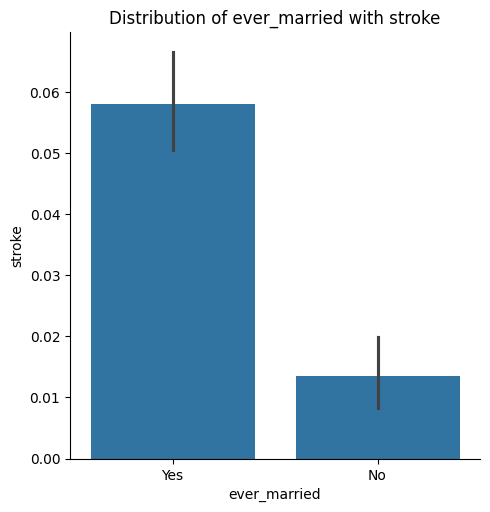

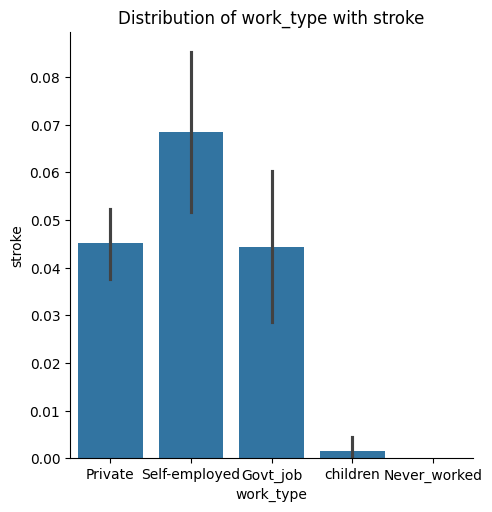

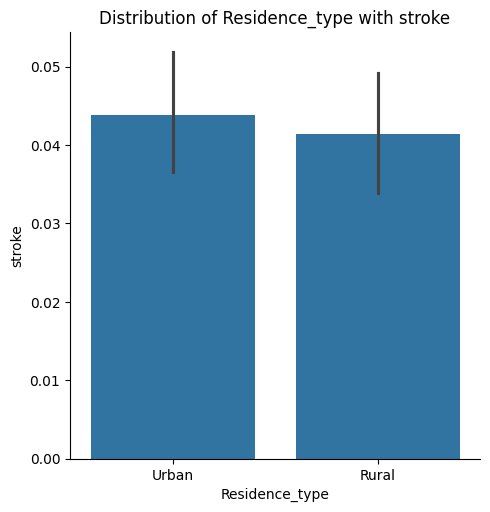

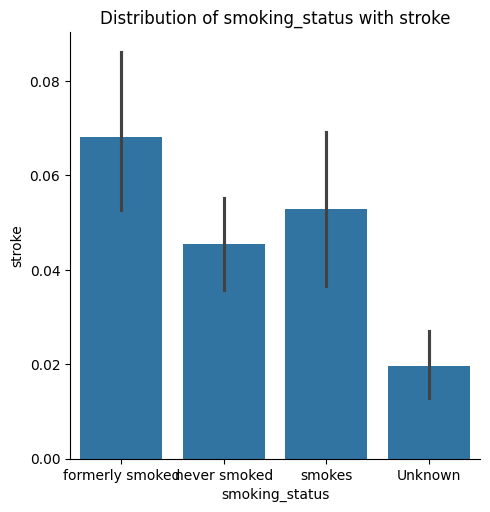

In [30]:
# Comparing the makeup percentage of categorical or boolean variables to stroke 
def distribution_comparison(column_name):
    if df[column_name].dtype != float and df[column_name].dtype != int:
        pass
    sns.catplot(data=df, y='stroke', x=column_name, kind='bar')
    plt.title(f"Distribution of {column_name} with stroke")
    plt.show()

for column in df.columns:
    if column in data_types['categorical'] or column in data_types['boolean']:
        if column == 'stroke':
            continue
        distribution_comparison(column)

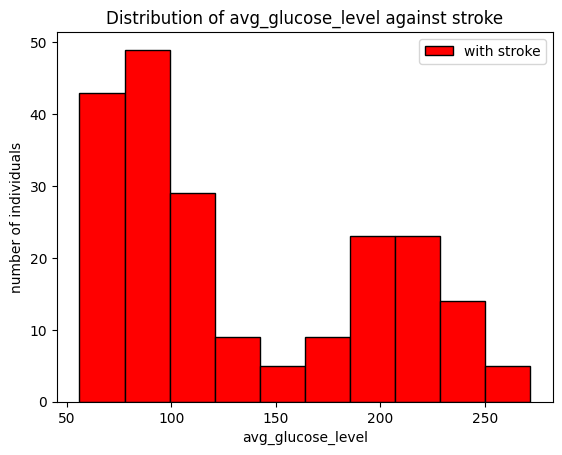

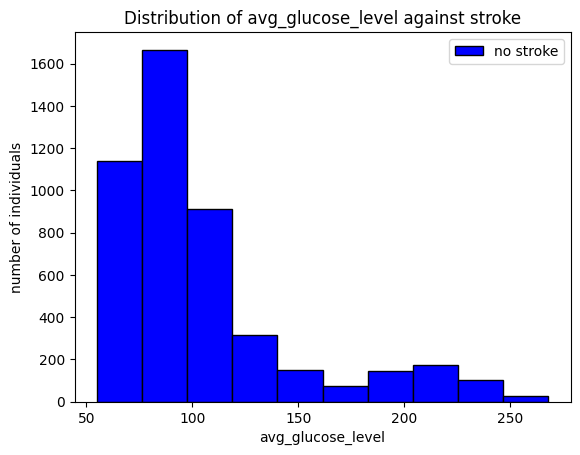

In [31]:
# Show distribution of continous columns with those with strike and those without
def distribution_num(column_name, bins = 10):
    with_stroke = df[df['stroke'] == 1]
    no_stroke = df[df['stroke'] == 0]

    # With stroke
    plt.figure(1)
    plt.hist(with_stroke[column_name], color='red', bins=bins, edgecolor='black')
    plt.title(f"Distribution of {column_name} against stroke")
    plt.legend(['with stroke'])
    plt.xlabel(f"{column_name}")
    plt.ylabel("number of individuals")

    # Without stroke
    plt.figure(2)
    plt.hist(no_stroke[column_name], color='blue', bins=bins, edgecolor='black')
    plt.title(f"Distribution of {column_name} against stroke")
    plt.legend(['no stroke'])
    plt.xlabel(f"{column_name}")
    plt.ylabel("number of individuals")
    plt.show()
    
distribution_num('avg_glucose_level')



### Encoding with labeling

In [32]:
def label_encoding(df):
    le = LabelEncoder()
    df['gender'] = le.fit_transform(df['gender'])
    df['ever_married'] = le.fit_transform(df['ever_married'])
    df['work_type'] = le.fit_transform(df['work_type'])
    df['Residence_type'] = le.fit_transform(df['Residence_type'])
    df['smoking_status'] = le.fit_transform(df['smoking_status'])
    return df

df = label_encoding(df)

### Values after labeling

In [33]:
for column in df.columns:
    if column in data_types['categorical']:
        print(f'{column}: {df[column].unique()}')

gender: [1 0 2]
work_type: [2 3 0 4 1]
Residence_type: [1 0]
smoking_status: [1 2 3 0]


### Correlation matrix 

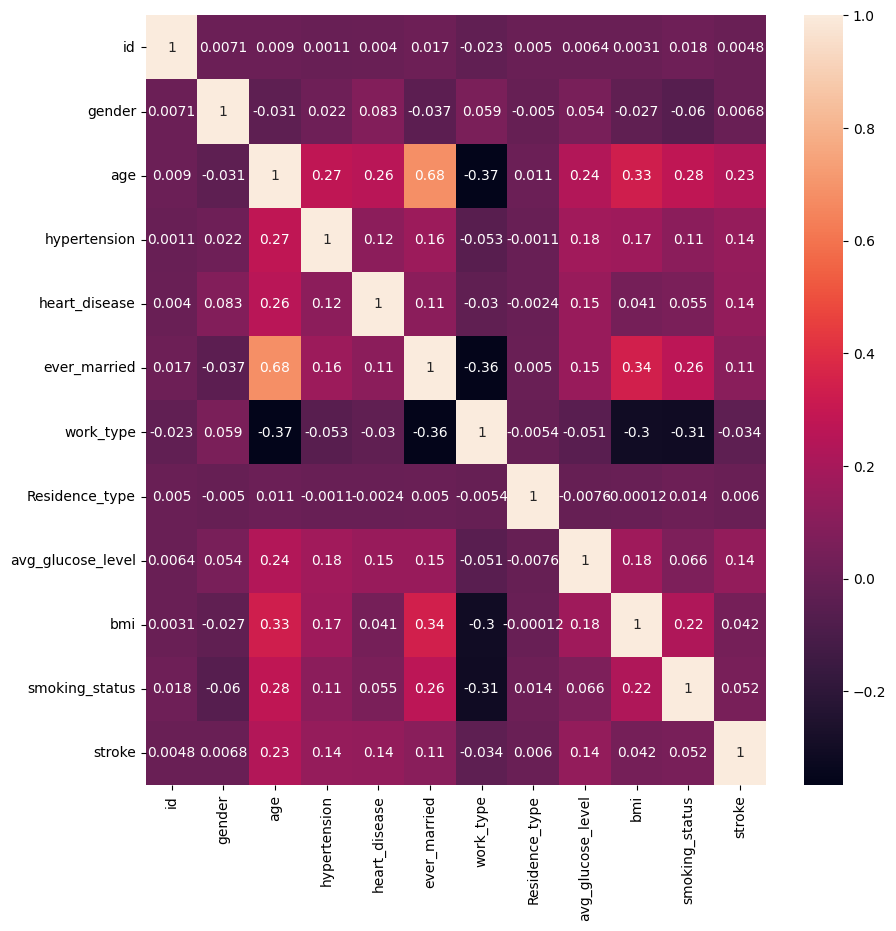

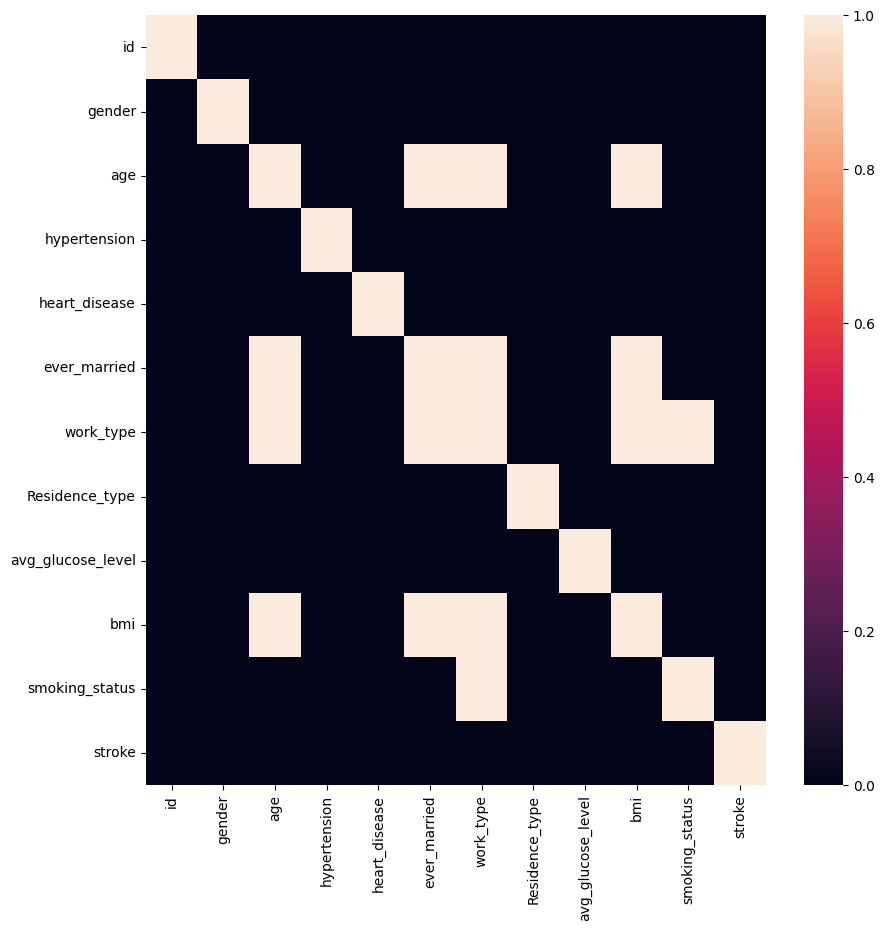

In [34]:
def correlation_matrix(threshold_status, threshold = 0):
    corr_matrix = df.corr()
    if not threshold_status: 
        plt.figure(figsize=(10, 10))
        sns.heatmap(corr_matrix, annot=True)
        plt.show()
    else:
        plt.figure(figsize=(10, 10))
        matrix_with_threshold = corr_matrix.abs() > threshold
        sns.heatmap(matrix_with_threshold)

correlation_matrix(False)
correlation_matrix(True, 0.3)